In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [25]:
data = pd.read_csv('C:/Users/luyid/Desktop/project.csv')

In [26]:
data['Retired'] = [1 if '1' in x else 0 for x in data['WHYNWRK1']]
data['Taking_care'] = [1 if '2' in x else 0 for x in data['WHYNWRK1']]
data['Goschool'] = [1 if '3' in x else 0 for x in data['WHYNWRK1']]
data['Disabled'] =[1 if '4' in x else 0 for x in data['WHYNWRK1']]
data['Unablefind'] =[1 if '5' in x else 0 for x in data['WHYNWRK1']]
data['dosthelse'] =[1 if '6' in x else 0 for x in data['WHYNWRK1']]
data['Northeast'] = [1 if x=="1" else 0 for x in data['REGION']]
data['Midwest'] = [1 if x=="2" else 0 for x in data['REGION']]
data['South'] = [1 if x=="3" else 0 for x in data['REGION']]
data['West'] = [1 if x=="4" else 0 for x in data['REGION']]
data['Alcohol'] = [1 if x>0 else 0 for x in data['alcbev2weeks']]
data['miscfood'] = data['miscfood2weeks']
data['Urban'] = [1 if x==1 else 0 for x in data['BLS_URBN']]
data['AfrAmer'] = data['Black']

In [28]:
data = data.drop(['WHYNWRK1'], axis=1)
data = data.drop(['REGION'], axis=1)
data = data.drop(['alcbev2weeks'], axis=1)
data = data.drop(['miscfood2weeks'], axis=1)
data = data.drop(['BLS_URBN'], axis=1)
data = data.drop(['Black'], axis=1)


KeyError: "['WHYNWRK1'] not found in axis"

In [29]:
data.head()

,AGE_REF,FAM_SIZE,SMOKSUPP,DRUGSUPP,HOUSKEEP,Asian,White,foawho,nonalbev,sweets,...,Unablefind,dosthelse,Northeast,Midwest,South,West,Alcohol,miscfood,Urban,AfrAmer
0,78,1,0.0,0.00,0.00,0,1,0.000000,0.0000,0.00,...,0,0,0,1,0,0,0,16.00,1,0
1,60,1,0.0,0.00,14.07,0,1,61.353001,21.5322,0.00,...,0,0,0,0,1,0,0,2.99,1,0
2,32,1,0.0,0.00,0.00,0,0,20.330000,0.0000,1.39,...,0,0,1,0,0,0,0,19.57,1,1
3,60,1,0.0,0.00,32.38,0,1,9.440000,0.0000,0.00,...,0,0,0,0,1,0,1,6.56,1,0
4,39,1,0.0,3.97,43.02,0,0,0.000000,13.3600,1.50,...,0,0,0,0,1,0,0,20.69,1,1


In [30]:
data.isnull().sum().sort_values(ascending=False).head()

AfrAmer       0
sweets        0
highschool    0
Single        0
Female        0
dtype: int64

In [31]:
data.columns

Index(['AGE_REF', 'FAM_SIZE', 'SMOKSUPP', 'DRUGSUPP', 'HOUSKEEP', 'Asian',
       'White', 'foawho', 'nonalbev', 'sweets', 'allcereal', 'ttfruits',
       'ttveg', 'alldairy', 'Female', 'Single', 'highschool', 'college',
       'bachelor', 'allbeef', 'allpork', 'allpoultry', 'allseafood', 'alleggs',
       'employ', 'Retired', 'Taking_care', 'Goschool', 'Disabled',
       'Unablefind', 'dosthelse', 'Northeast', 'Midwest', 'South', 'West',
       'Alcohol', 'miscfood', 'Urban', 'AfrAmer'],
      dtype='object')

In [91]:
sns.set_style('ticks') 

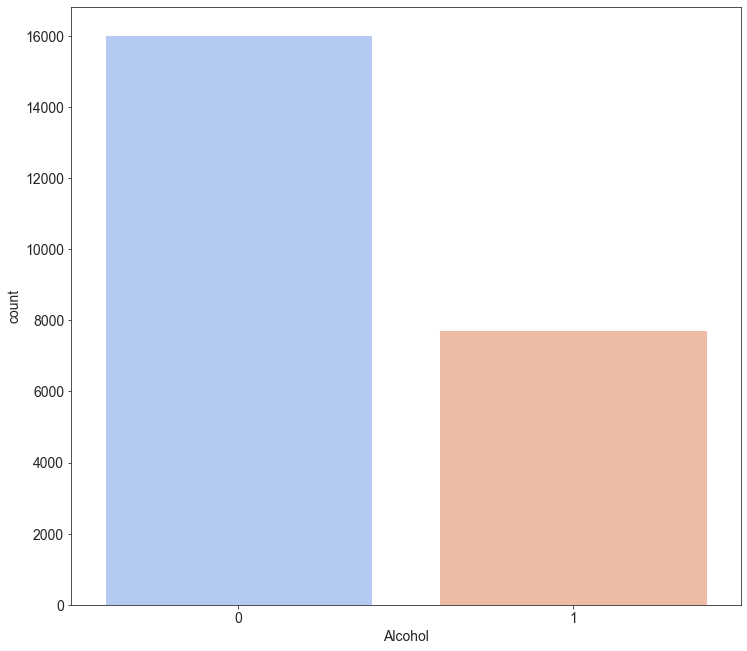

In [93]:
sns.countplot(x='Alcohol',data=train, palette ='coolwarm')

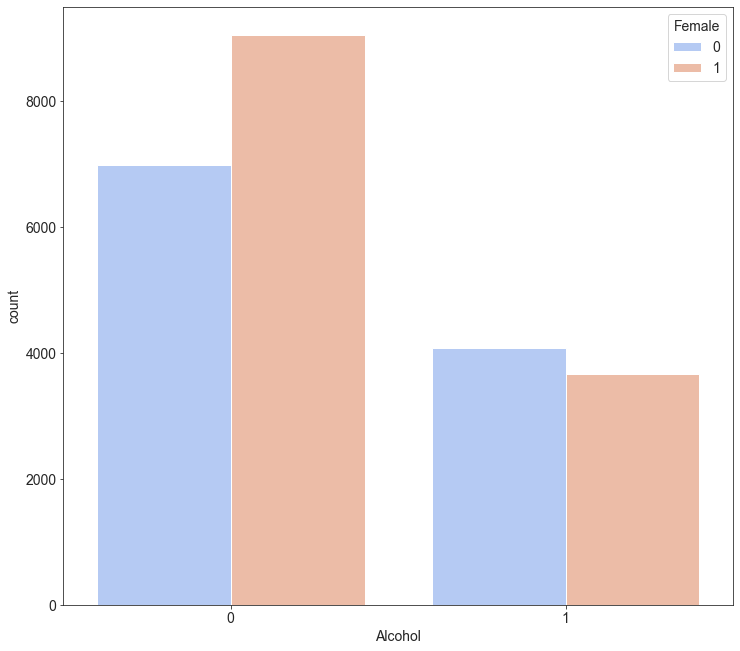

In [174]:
sns.countplot(x='Alcohol',data=train, hue='Female', palette ='coolwarm')

In [179]:
def label_race (row):
    if row['White'] == 1 :
        return 'White'
    if row['AfrAmer'] == 1 :
        return 'African American'
    return 'Asian & Other'

In [180]:
train['Racial'] = train.apply (lambda row: label_race(row), axis=1)

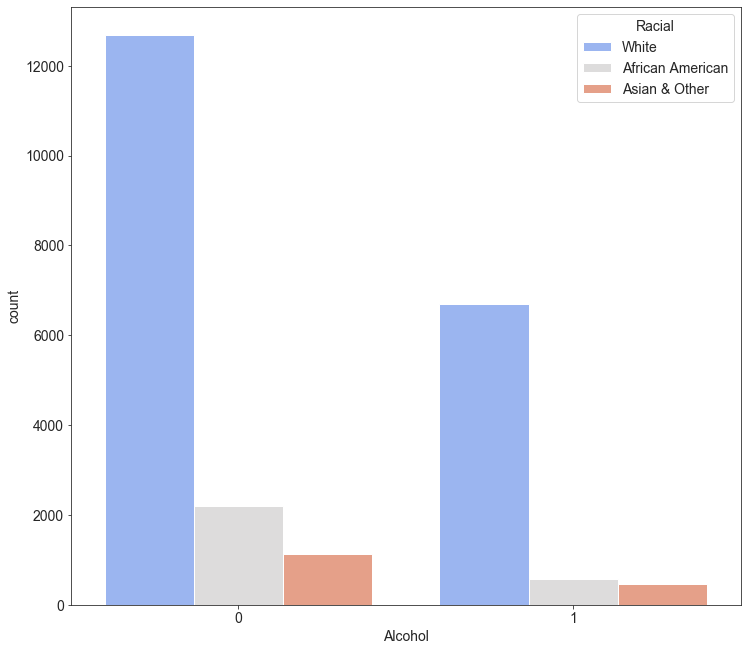

In [181]:
sns.countplot(x='Alcohol',data=train, hue='Racial', palette ='coolwarm')

In [182]:
train = train.drop(['Racial'], axis=1)

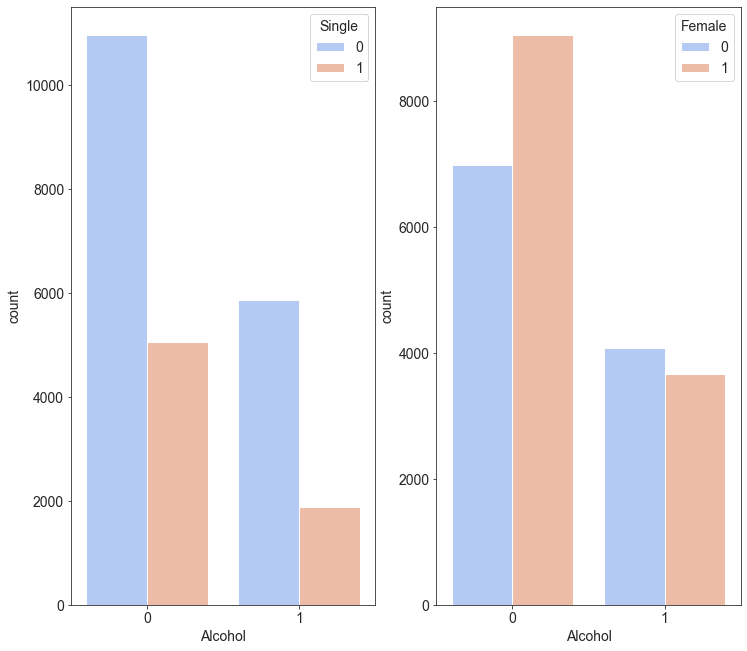

In [183]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='Alcohol',data=train, hue='Single', palette ='coolwarm', ax=ax[0])
sns.countplot(x='Alcohol',data=train, hue='Female', palette ='coolwarm', ax=ax[1])
fig.show()

In [188]:
def label_employ (row):
    if row['employ'] == 1 :
        return 'Employed'
    if row['Retired'] == 1 :
        return 'Retired'
    if row['Disabled'] == 1 :
        return 'Disabled'
    if row['Taking_care'] == 1 :
        return 'Taking care of others'
    if row['Goschool'] == 1 :
        return 'Go School'
    if row['Unablefind'] == 1 :
        return 'Unable to find a job'
    return 'Do sth else'

In [189]:
train['Employ_condition'] = train.apply (lambda row: label_employ(row), axis=1)

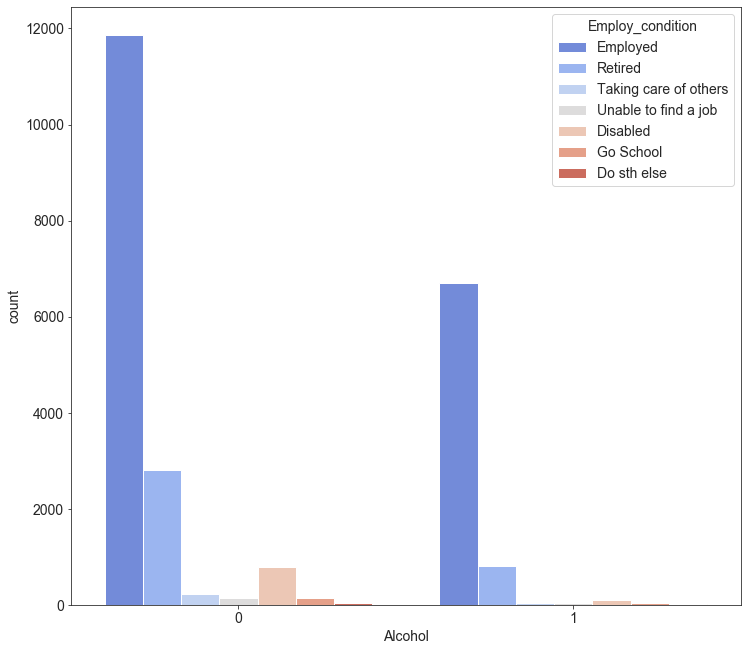

In [190]:
sns.countplot(x='Alcohol',data=train, hue='Employ_condition', palette ='coolwarm')

In [191]:
train = train.drop(['Employ_condition'], axis=1)

In [194]:
def label_edu (row):
    if row['highschool'] == 1 :
        return 'High School and under'
    if row['college'] == 1 :
        return 'Some college'
    return 'Bachelor and above'
train['Educ'] = train.apply (lambda row: label_edu(row), axis=1)

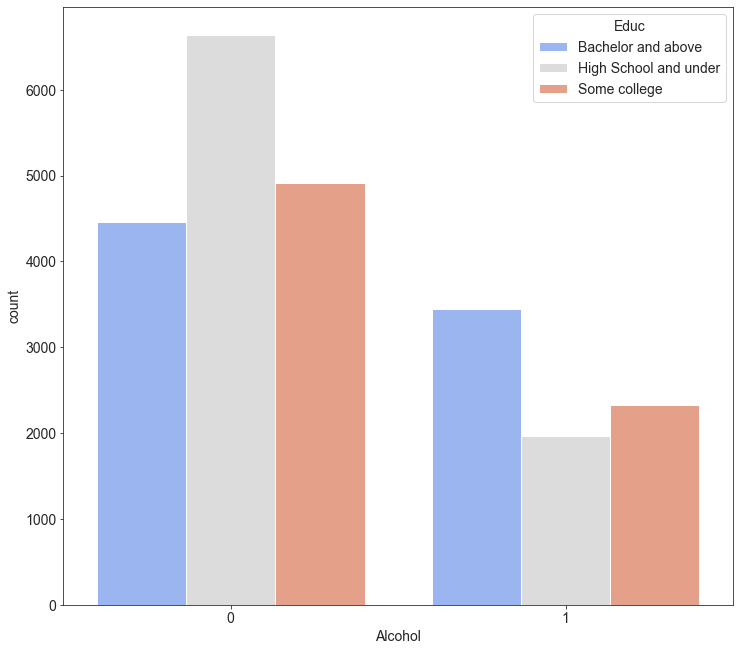

In [195]:
sns.countplot(x='Alcohol',data=train, hue='Educ', palette ='coolwarm')

In [196]:
train = train.drop(['Educ'], axis=1)

In [197]:
def label_Region (row):
    if row['Northeast'] == 1 :
        return 'Northeast'
    if row['South'] == 1 :
        return 'South'
    if row['Midwest'] == 1 :
        return 'Midwest'
    return 'West'
train['Region'] = train.apply (lambda row: label_Region(row), axis=1)

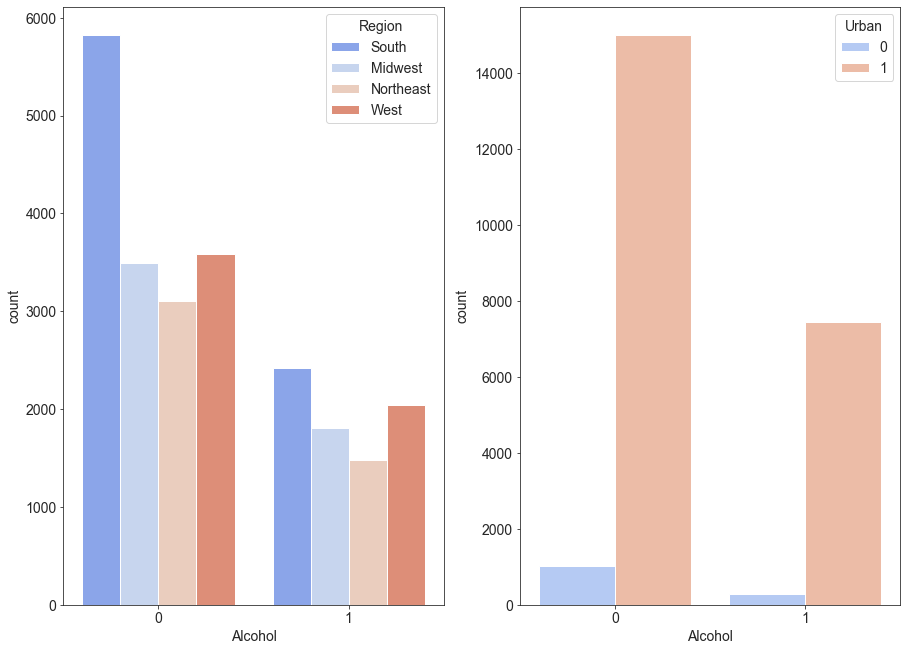

In [202]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='Alcohol',data=train, hue='Region', palette ='coolwarm', ax=ax[0])
sns.countplot(x='Alcohol',data=train, hue='Urban', palette ='coolwarm', ax=ax[1])
fig.show()

In [32]:
data.dtypes

AGE_REF          int64
FAM_SIZE         int64
SMOKSUPP       float64
DRUGSUPP       float64
HOUSKEEP       float64
Asian            int64
White            int64
foawho         float64
nonalbev       float64
sweets         float64
allcereal      float64
ttfruits       float64
ttveg          float64
alldairy       float64
Female           int64
Single           int64
highschool       int64
college          int64
bachelor         int64
allbeef        float64
allpork        float64
allpoultry     float64
allseafood     float64
alleggs        float64
employ           int64
Retired          int64
Taking_care      int64
Goschool         int64
Disabled         int64
Unablefind       int64
dosthelse        int64
Northeast        int64
Midwest          int64
South            int64
West             int64
Alcohol          int64
miscfood       float64
Urban            int64
AfrAmer          int64
dtype: object

In [33]:
train, test =train_test_split(data, test_size=0.3, random_state=1)
val, test =train_test_split(test, test_size=0.5, random_state=1)

In [34]:
data.count()

AGE_REF        33927
FAM_SIZE       33927
SMOKSUPP       33927
DRUGSUPP       33927
HOUSKEEP       33927
Asian          33927
White          33927
foawho         33927
nonalbev       33927
sweets         33927
allcereal      33927
ttfruits       33927
ttveg          33927
alldairy       33927
Female         33927
Single         33927
highschool     33927
college        33927
bachelor       33927
allbeef        33927
allpork        33927
allpoultry     33927
allseafood     33927
alleggs        33927
employ         33927
Retired        33927
Taking_care    33927
Goschool       33927
Disabled       33927
Unablefind     33927
dosthelse      33927
Northeast      33927
Midwest        33927
South          33927
West           33927
Alcohol        33927
miscfood       33927
Urban          33927
AfrAmer        33927
dtype: int64

In [35]:
train.count()

AGE_REF        23748
FAM_SIZE       23748
SMOKSUPP       23748
DRUGSUPP       23748
HOUSKEEP       23748
Asian          23748
White          23748
foawho         23748
nonalbev       23748
sweets         23748
allcereal      23748
ttfruits       23748
ttveg          23748
alldairy       23748
Female         23748
Single         23748
highschool     23748
college        23748
bachelor       23748
allbeef        23748
allpork        23748
allpoultry     23748
allseafood     23748
alleggs        23748
employ         23748
Retired        23748
Taking_care    23748
Goschool       23748
Disabled       23748
Unablefind     23748
dosthelse      23748
Northeast      23748
Midwest        23748
South          23748
West           23748
Alcohol        23748
miscfood       23748
Urban          23748
AfrAmer        23748
dtype: int64

In [36]:
val.count()

AGE_REF        5089
FAM_SIZE       5089
SMOKSUPP       5089
DRUGSUPP       5089
HOUSKEEP       5089
Asian          5089
White          5089
foawho         5089
nonalbev       5089
sweets         5089
allcereal      5089
ttfruits       5089
ttveg          5089
alldairy       5089
Female         5089
Single         5089
highschool     5089
college        5089
bachelor       5089
allbeef        5089
allpork        5089
allpoultry     5089
allseafood     5089
alleggs        5089
employ         5089
Retired        5089
Taking_care    5089
Goschool       5089
Disabled       5089
Unablefind     5089
dosthelse      5089
Northeast      5089
Midwest        5089
South          5089
West           5089
Alcohol        5089
miscfood       5089
Urban          5089
AfrAmer        5089
dtype: int64

In [13]:
test.count()

AGE_REF        5090
FAM_SIZE       5090
SMOKSUPP       5090
DRUGSUPP       5090
HOUSKEEP       5090
Asian          5090
White          5090
foawho         5090
nonalbev       5090
sweets         5090
allcereal      5090
ttfruits       5090
ttveg          5090
alldairy       5090
Single         5090
highschool     5090
college        5090
bachelor       5090
allbeef        5090
allpork        5090
allpoultry     5090
allseafood     5090
alleggs        5090
employ         5090
Retired        5090
Taking_care    5090
Goschool       5090
Disabled       5090
Unablefind     5090
dosthelse      5090
Northeast      5090
Midwest        5090
South          5090
West           5090
Alcohol        5090
miscfood       5090
Urban          5090
AfrAmer        5090
dtype: int64

In [37]:
x_train = train.drop(['Alcohol'], axis=1)
y_train = train['Alcohol']
x_test = test.drop(['Alcohol'], axis=1)
y_test = test['Alcohol']
x_val = val.drop(['Alcohol'], axis=1)
y_val = val['Alcohol']

# Logistic Regression

In [235]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [236]:
log_pred = logmodel.predict(x_val)
print(classification_report(y_val,log_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.81      3441
           1       0.63      0.33      0.43      1648

    accuracy                           0.72      5089
   macro avg       0.68      0.62      0.62      5089
weighted avg       0.70      0.72      0.69      5089



In [237]:
log_ROC_auc4=roc_auc_score(y_val, logmodel.predict_proba(x_val)[:,1])
fpr4, tpr4, threshold=roc_curve(y_val, logmodel.predict_proba(x_val)[:,1])

<function matplotlib.pyplot.show(*args, **kw)>

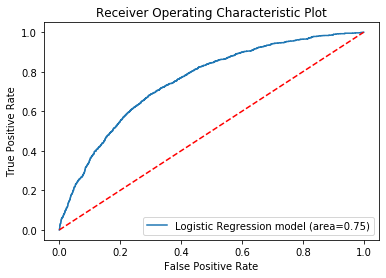

In [238]:
plt.figure()
plt.plot(fpr4,tpr4, label="Logistic Regression model (area=%0.2f)" % log_ROC_auc4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Plot")
plt.legend(loc="lower right")
plt.show

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
print ("Accuracy : ", accuracy_score(y_train,y_rf_train)) 
print(classification_report(y_train,y_rf_train))

In [39]:
rfc_pred = rfc.predict(x_val)

In [17]:
print(classification_report(y_val,rfc_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      3441
           1       0.62      0.43      0.51      1648

    accuracy                           0.73      5089
   macro avg       0.69      0.65      0.66      5089
weighted avg       0.72      0.73      0.71      5089



In [ ]:
#The recall means "how many of this class you find over the whole number of element of this class"

#The precision will be "how many are correctly classified among that class"



In [119]:
print ("Accuracy : ", accuracy_score(y_val,rfc_pred)) 

Accuracy :  0.7307919041068972


In [40]:
rfc_ROC_auc4=roc_auc_score(y_val, rfc.predict_proba(x_val)[:,1])
fpr4, tpr4, threshold=roc_curve(y_val, rfc.predict_proba(x_val)[:,1])

<function matplotlib.pyplot.show(*args, **kw)>

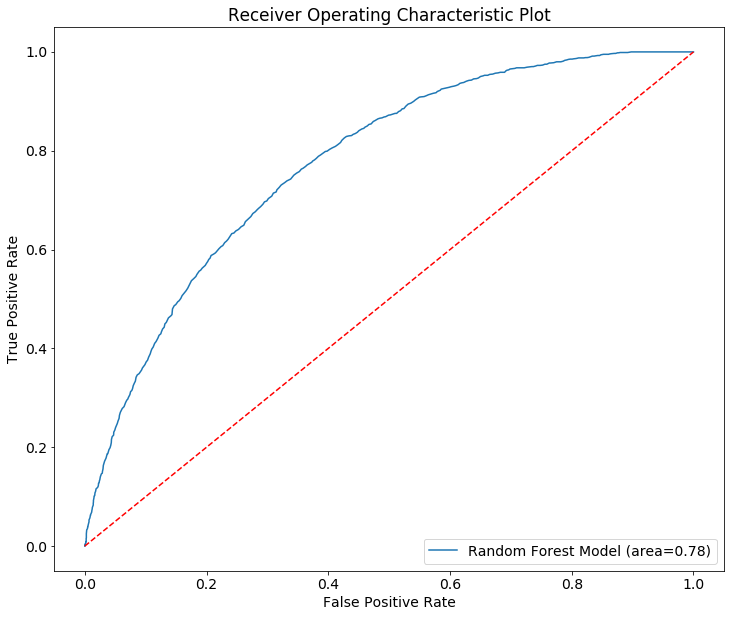

In [41]:
plt.figure()
plt.plot(fpr4,tpr4, label="Random Forest Model (area=%0.2f)" % rfc_ROC_auc4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Plot")
plt.legend(loc="lower right")
plt.show

In [42]:
rfc_importances = rfc.feature_importances_

In [43]:
rfc_importances

array([0.05876402, 0.02670653, 0.0229475 , 0.02385709, 0.04813776,
       0.00325291, 0.00815988, 0.14418502, 0.05377683, 0.04061198,
       0.0432726 , 0.05332354, 0.0570312 , 0.06105998, 0.01186531,
       0.0070187 , 0.01205228, 0.00646124, 0.01341069, 0.03545801,
       0.03476801, 0.03401538, 0.02988634, 0.03441706, 0.00892187,
       0.00528958, 0.00355168, 0.00140181, 0.00357917, 0.00131789,
       0.00058348, 0.00748313, 0.00800704, 0.00924304, 0.00879792,
       0.0679482 , 0.00439184, 0.00504347])

In [44]:
x_train.columns

Index(['AGE_REF', 'FAM_SIZE', 'SMOKSUPP', 'DRUGSUPP', 'HOUSKEEP', 'Asian',
       'White', 'foawho', 'nonalbev', 'sweets', 'allcereal', 'ttfruits',
       'ttveg', 'alldairy', 'Female', 'Single', 'highschool', 'college',
       'bachelor', 'allbeef', 'allpork', 'allpoultry', 'allseafood', 'alleggs',
       'employ', 'Retired', 'Taking_care', 'Goschool', 'Disabled',
       'Unablefind', 'dosthelse', 'Northeast', 'Midwest', 'South', 'West',
       'miscfood', 'Urban', 'AfrAmer'],
      dtype='object')

In [200]:
plt.rcParams.update({'figure.figsize': (15.0, 11.0)})
plt.rcParams.update({'font.size': 14})

Text(0.5, 0, 'Random Forest Feature Importance')

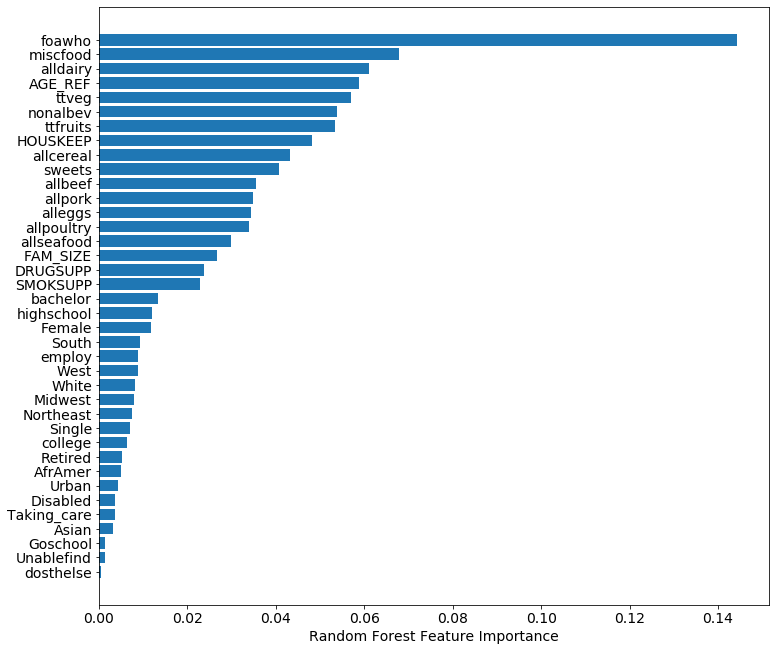

In [48]:
sorted_idx = rfc_importances.argsort()
plt.barh(x_train.columns[sorted_idx], rfc_importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [49]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(rfc, x_val, y_val, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

Text(0.5, 0, 'Random Forest Feature Importance')

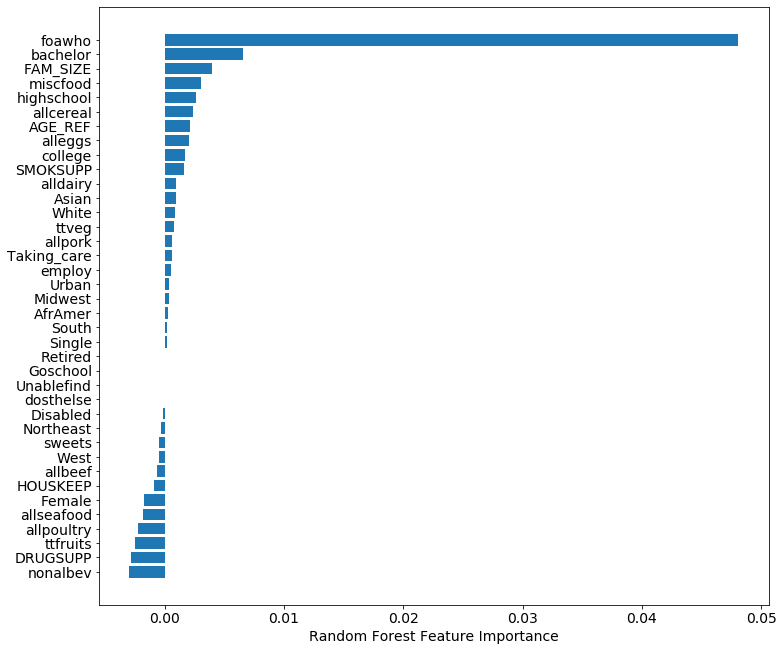

In [62]:
plt.barh(x_val.columns[sorted_idx], result.importances_mean[sorted_idx].T)
plt.xlabel("Random Forest Feature Importance")

In [63]:
xnew_train = train.drop(['Alcohol','nonalbev','DRUGSUPP','ttfruits','allpoultry','allseafood'], axis=1)
ynew_train = train['Alcohol']
xnew_val = val.drop(['Alcohol','nonalbev','DRUGSUPP','ttfruits','allpoultry','allseafood'], axis=1)
ynew_val = val['Alcohol']

In [64]:
rfc.fit(xnew_train, ynew_train)
rfc_prednew = rfc.predict(xnew_val)

In [65]:
print(classification_report(ynew_val,rfc_prednew))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      3441
           1       0.63      0.43      0.51      1648

    accuracy                           0.74      5089
   macro avg       0.70      0.66      0.67      5089
weighted avg       0.72      0.74      0.72      5089



In [ ]:
rfc_ROC_auc4=roc_auc_score(y_val, rfc.predict_proba(x_val)[:,1])
fpr4, tpr4, threshold=roc_curve(y_val, rfc.predict_proba(x_val)[:,1])

In [71]:
rfc_ROC_auc4=roc_auc_score(ynew_val, rfc.predict_proba(xnew_val)[:,1])
fpr4, tpr4, threshold=roc_curve(ynew_val, rfc.predict_proba(xnew_val)[:,1])

<function matplotlib.pyplot.show(*args, **kw)>

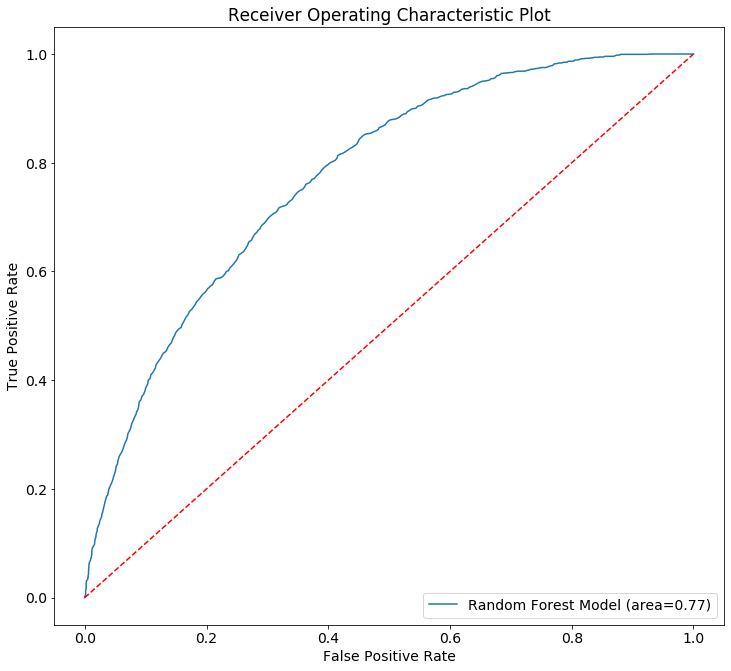

In [72]:
plt.figure()
plt.plot(fpr4,tpr4, label="Random Forest Model (area=%0.2f)" % rfc_ROC_auc4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Plot")
plt.legend(loc="lower right")
plt.show

# Gradient Boosting

In [74]:
gbc = GradientBoostingClassifier(n_estimators=500, random_state=0)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=500, random_state=0)

In [75]:
gbc_pred = gbc.predict(x_val)

In [76]:
print(classification_report(y_val,gbc_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      3441
           1       0.61      0.46      0.53      1648

    accuracy                           0.73      5089
   macro avg       0.69      0.66      0.67      5089
weighted avg       0.72      0.73      0.72      5089



In [122]:
print ("Accuracy : ", accuracy_score(y_val,gbc_pred)) 

Accuracy :  0.7302023973275693


In [253]:
gbc_ROC_auc4=roc_auc_score(y_val, gbc.predict_proba(x_val)[:,1])
fpr4, tpr4, threshold=roc_curve(y_val, gbc.predict_proba(x_val)[:,1])

<function matplotlib.pyplot.show(*args, **kw)>

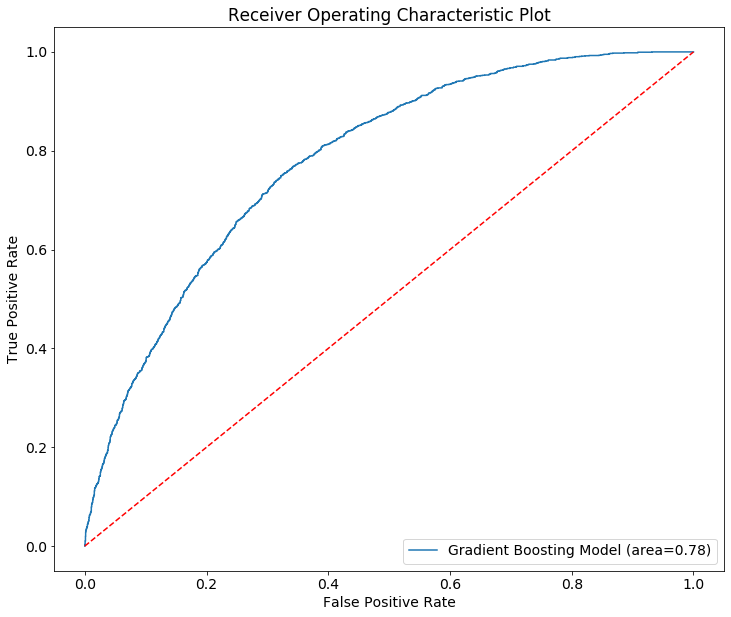

In [254]:
plt.figure()
plt.plot(fpr4,tpr4, label="Gradient Boosting Model (area=%0.2f)" % gbc_ROC_auc4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Plot")
plt.legend(loc="lower right")
plt.show

In [77]:
gbc_importances = gbc.feature_importances_

Text(0.5, 0, 'Gradient Boosting Feature Importance')

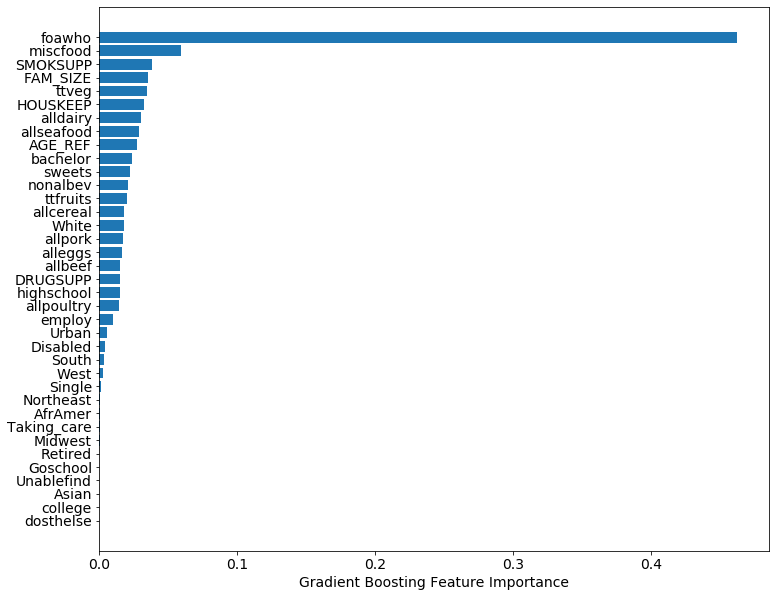

In [256]:
sorted_idx = gbc_importances.argsort()
plt.barh(x_train.columns[sorted_idx], gbc_importances[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")

In [78]:
result = permutation_importance(gbc, x_val, y_val, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

Text(0.5, 0, 'Gradient Boosting Feature Importance')

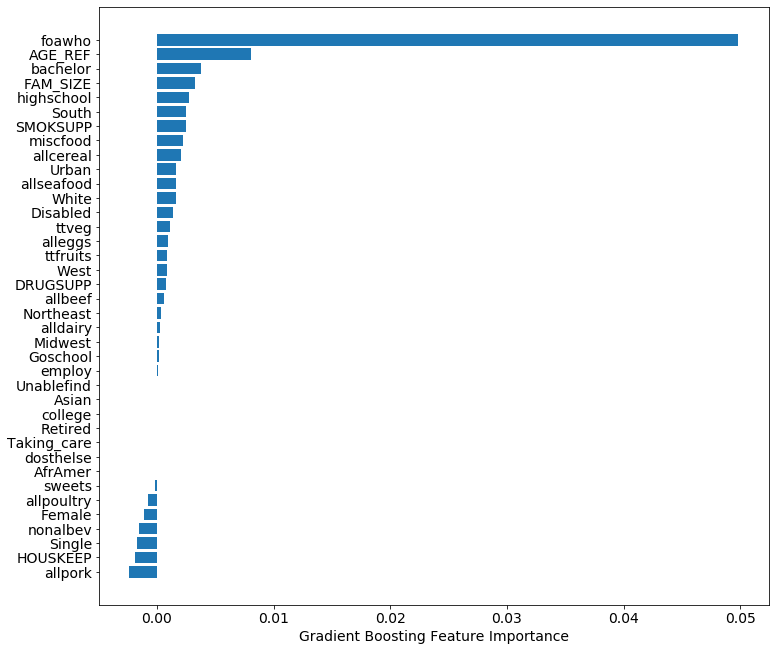

In [79]:
plt.barh(x_val.columns[sorted_idx], result.importances_mean[sorted_idx].T)
plt.xlabel("Gradient Boosting Feature Importance")

In [130]:
xnewg_train = train.drop(['Alcohol','allpork','HOUSKEEP','Single','nonalbev','Female'], axis=1)
ynewg_train = train['Alcohol']
xnewg_val = val.drop(['Alcohol','allpork','HOUSKEEP','Single','nonalbev','Female'], axis=1)
ynewg_val = val['Alcohol']

In [131]:
gbc.fit(xnewg_train, ynewg_train)
gbc_prednew = gbc.predict(xnewg_val)

In [132]:
print(classification_report(ynewg_val,gbc_prednew))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82      3441
           1       0.63      0.47      0.54      1648

    accuracy                           0.74      5089
   macro avg       0.70      0.67      0.68      5089
weighted avg       0.73      0.74      0.73      5089



In [133]:
gbc_ROC_auc4=roc_auc_score(ynewg_val, gbc.predict_proba(xnewg_val)[:,1])
fpr4, tpr4, threshold=roc_curve(ynewg_val, gbc.predict_proba(xnewg_val)[:,1])

<function matplotlib.pyplot.show(*args, **kw)>

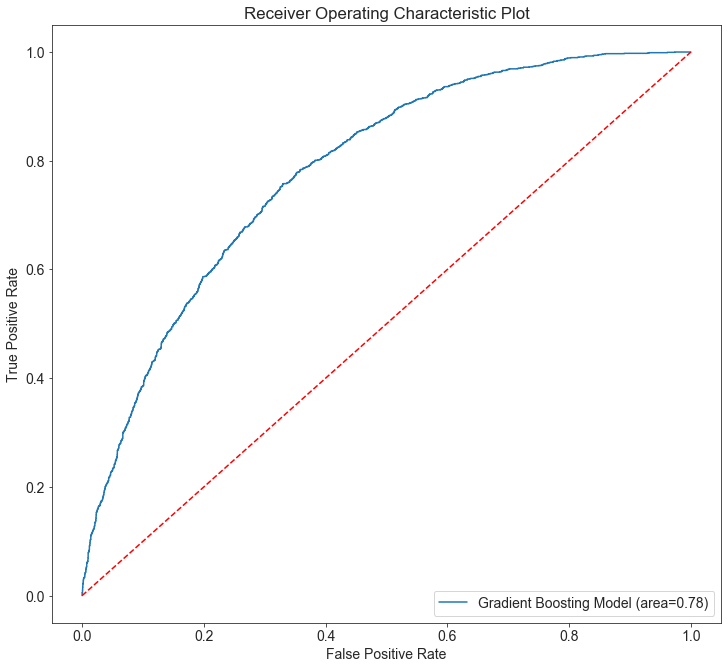

In [134]:
plt.figure()
plt.plot(fpr4,tpr4, label="Gradient Boosting Model (area=%0.2f)" % gbc_ROC_auc4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Plot")
plt.legend(loc="lower right")
plt.show

In [158]:
result = permutation_importance(gbc, xnewg_val, ynewg_val, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

Text(0.5, 0, 'Gradient Boosting Feature Importance')

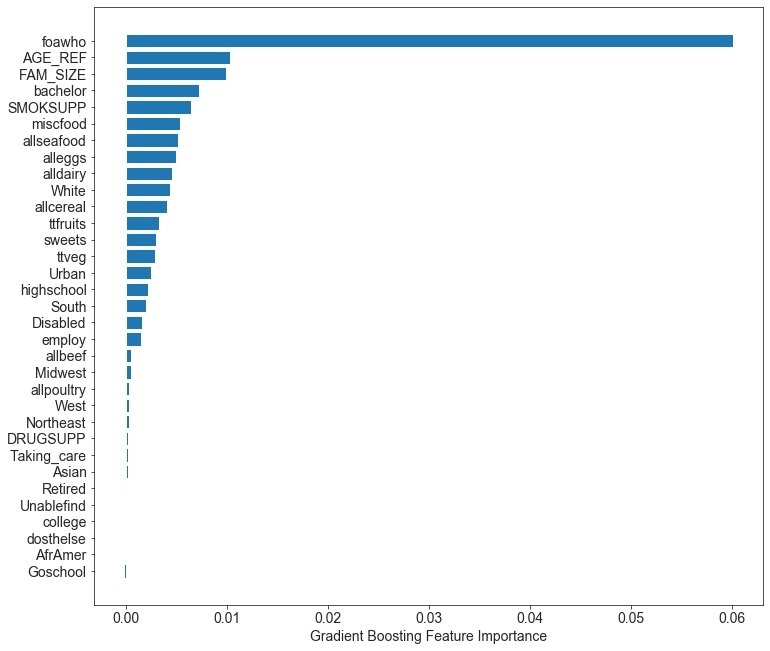

In [159]:
plt.barh(xnewg_val.columns[sorted_idx], result.importances_mean[sorted_idx].T)
plt.xlabel("Gradient Boosting Feature Importance")

In [165]:
xnewg_test = test.drop(['Alcohol','allpork','HOUSKEEP','Single','nonalbev','Female'], axis=1)
ynewg_test = test['Alcohol']

In [166]:
gbc_pretestnew = gbc.predict(xnewg_test)

In [167]:
print(classification_report(ynewg_test,gbc_pretestnew))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      3449
           1       0.60      0.46      0.52      1641

    accuracy                           0.73      5090
   macro avg       0.69      0.66      0.67      5090
weighted avg       0.72      0.73      0.72      5090



In [168]:
gbc_ROC_auc4=roc_auc_score(ynewg_test, gbc.predict_proba(xnewg_test)[:,1])
fpr4, tpr4, threshold=roc_curve(ynewg_test, gbc.predict_proba(xnewg_test)[:,1])

<function matplotlib.pyplot.show(*args, **kw)>

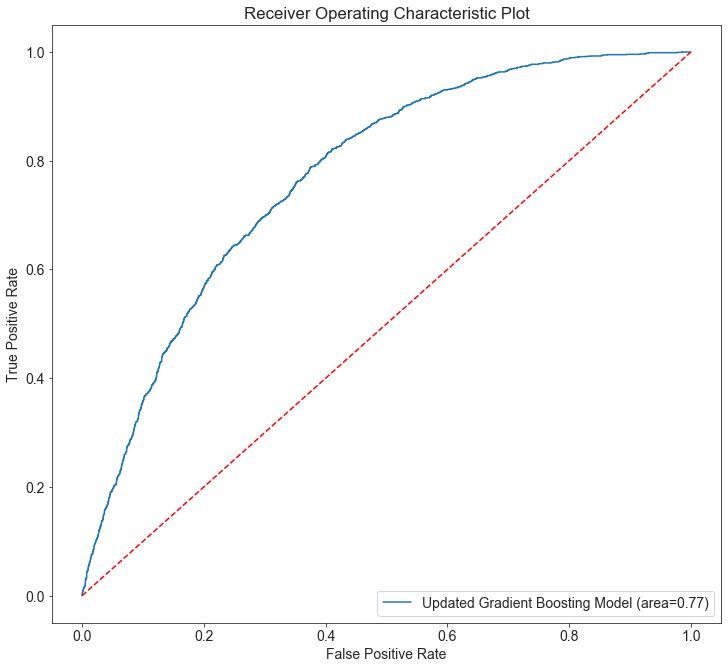

In [169]:
plt.figure()
plt.plot(fpr4,tpr4, label="Updated Gradient Boosting Model (area=%0.2f)" % gbc_ROC_auc4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Plot")
plt.legend(loc="lower right")
plt.show

In [170]:
result = permutation_importance(gbc, xnewg_test, ynewg_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

Text(0.5, 0, 'Updated Gradient Boosting Feature Importance')

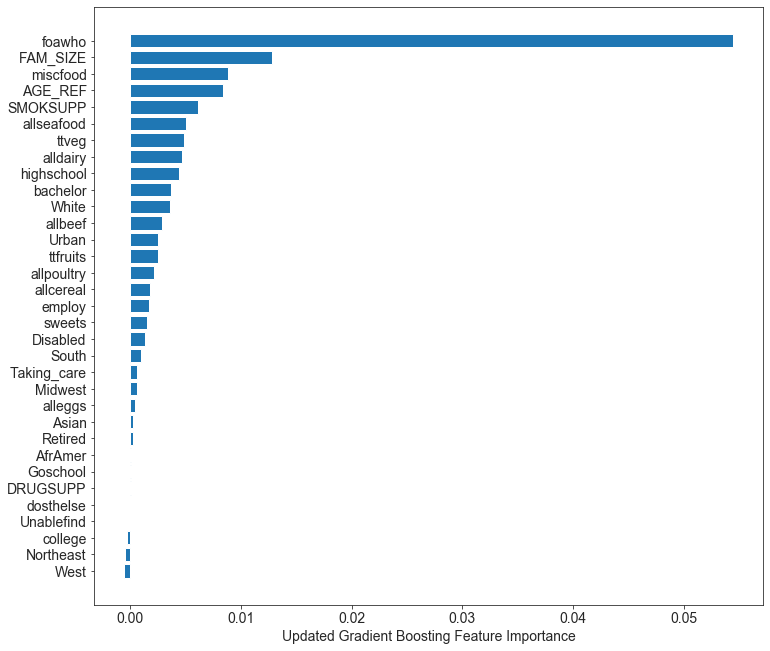

In [171]:
plt.barh(xnewg_test.columns[sorted_idx], result.importances_mean[sorted_idx].T)
plt.xlabel("Updated Gradient Boosting Feature Importance")

In [160]:
from sklearn.tree import export_graphviz

In [161]:
sub_tree_42 = gbc.estimators_[42, 0]

In [163]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24573 sha256=c9c4d96cb00a1e74818dac746baac2afed529663656c75294cef542d5617db06
  Stored in directory: C:\Users\luyid\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [164]:
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# XG BOOSTING

In [137]:
import sys
!{sys.executable} -m pip install xgboost

In [138]:
import xgboost as xgb
from xgboost import XGBClassifier

In [152]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
xgb_pred = xgb.predict(x_val)

In [154]:
print(classification_report(y_val,xgb_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      3441
           1       0.58      0.48      0.53      1648

    accuracy                           0.72      5089
   macro avg       0.68      0.66      0.66      5089
weighted avg       0.71      0.72      0.71      5089



In [ ]:
xgb.plot_tree(bst, num_trees=2)

In [156]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


# Ada Boost Classifier

In [124]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [125]:
abc_pred = abc.predict(x_val)

In [126]:
print ("Accuracy : ", accuracy_score(y_val,abc_pred)) 

Accuracy :  0.7264688543918255


In [127]:
print(classification_report(y_val,abc_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      3441
           1       0.60      0.45      0.52      1648

    accuracy                           0.73      5089
   macro avg       0.68      0.65      0.66      5089
weighted avg       0.71      0.73      0.71      5089



In [128]:
abc_ROC_auc4=roc_auc_score(y_val, abc.predict_proba(x_val)[:,1])
fpr4, tpr4, threshold=roc_curve(y_val, abc.predict_proba(x_val)[:,1])

<function matplotlib.pyplot.show(*args, **kw)>

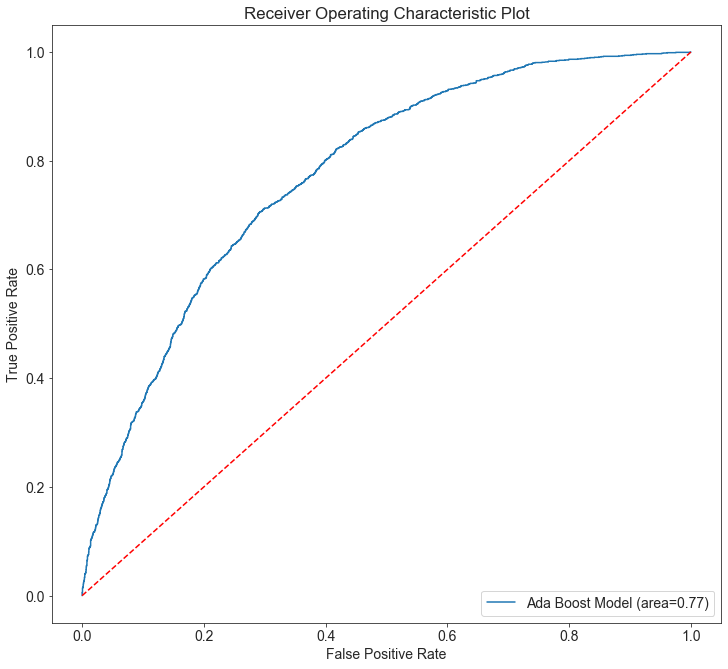

In [129]:
plt.figure()
plt.plot(fpr4,tpr4, label="Ada Boost Model (area=%0.2f)" % abc_ROC_auc4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Plot")
plt.legend(loc="lower right")
plt.show

In [262]:
abc_importances = abc.feature_importances_

Text(0.5, 0, 'Ada Boost Feature Importance')

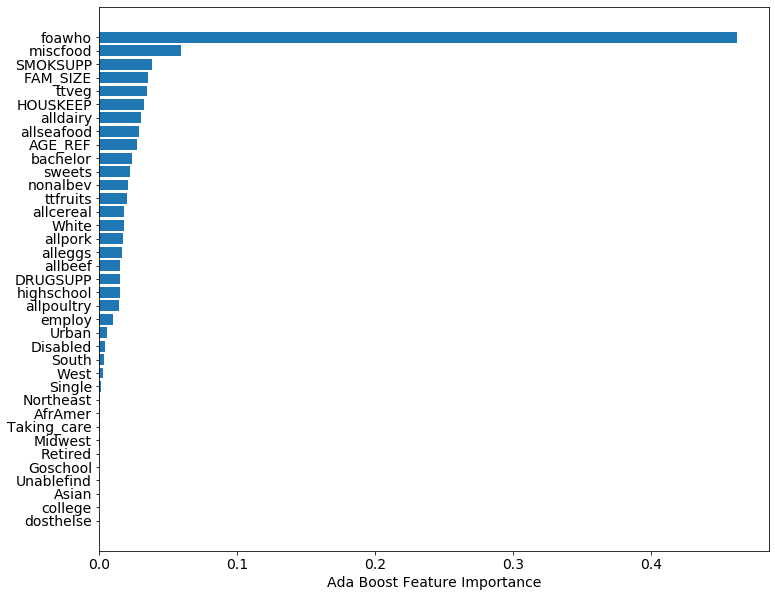

In [263]:
sorted_idx = gbc_importances.argsort()
plt.barh(x_train.columns[sorted_idx], gbc_importances[sorted_idx])
plt.xlabel("Ada Boost Feature Importance")

In [16]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }